## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os

In [2]:
music_data = r"H:\Deep Learning with Tensorflow IBM\Projects\Music Genre Recognition\archive\Data\genres_original"
meta_data = pd.read_csv(r"H:\Deep Learning with Tensorflow IBM\Projects\Music Genre Recognition\archive\Data\features_30_sec.csv")

### Feature Extraction

Mel Frequency Cepstral Co-efficients:
* Since the audio signals are constantly changing, first we divide these signals into smaller frames. 
* Next we identify different frequencies present in each frameand seperate linguistic frequencies from noise.
* At last we use Discrete Cosine Transformation to keep specific sequences of frequiences that have higher chances of having important info.

In [3]:
def features(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled = np.mean(mfccs.T, axis = 0)
    return mfccs_scaled

In [4]:
extracted_features = []
for index_num, row in tqdm(meta_data.iterrows()):
    try:
        final_class_labels = row['label']
        file_name = os.path.join(os.path.abspath(music_data), final_class_labels + '/', str(row['filename']))
        data = features(file_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print(f'Error: {e}')
        continue

554it [00:28, 19.84it/s]C:\Python\Python39\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
557it [00:28, 21.25it/s]

Error: 


1000it [00:51, 19.48it/s]


* Converting extracted feature into pandas dataframe.

In [5]:
extracted_features_pd = pd.DataFrame(extracted_features, columns = ['features', 'class'])

In [6]:
extracted_features_pd['class']. value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: class, dtype: int64

## Spliting Data

In [7]:
x = np.array(extracted_features_pd['features'].tolist())
y = np.array(extracted_features_pd['class'].tolist())

In [8]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((799, 40), (799, 10), (200, 40), (200, 10))

## ANN Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [20]:
num_labels = y.shape[1]
num_labels

10

In [34]:
model_ann = Sequential([
    Dense(1024, input_shape = (40,), activation = 'relu'),
    Dropout(0.25),
    Dense(512, activation = 'relu'),
    Dropout(0.25),
    Dense(256, activation = 'relu'),
    Dropout(0.25),
    Dense(128, activation = 'relu'),
    Dropout(0.25),
    Dense(64, activation = 'relu'),
    Dropout(0.25),
    Dense(32, activation = 'relu'),
    Dropout(0.25),
    Dense(num_labels, activation = 'softmax')
])

In [35]:
model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              41984     
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)              

In [36]:
model_ann.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
ann_fit = model_ann.fit(x_train, y_train, batch_size = 32, epochs = 500, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/500
25/25 [==============================] - 1s 14ms/step - loss: 4.1383 - accuracy: 0.1039 - val_loss: 2.3267 - val_accuracy: 0.1200
Epoch 2/500
25/25 [==============================] - 0s 10ms/step - loss: 2.5876 - accuracy: 0.1164 - val_loss: 2.2718 - val_accuracy: 0.0950
Epoch 3/500
25/25 [==============================] - 0s 10ms/step - loss: 2.4054 - accuracy: 0.1051 - val_loss: 2.2702 - val_accuracy: 0.1000
Epoch 4/500
25/25 [==============================] - 0s 10ms/step - loss: 2.3618 - accuracy: 0.1164 - val_loss: 2.2554 - val_accuracy: 0.1300
Epoch 5/500
25/25 [==============================] - 0s 10ms/step - loss: 2.3100 - accuracy: 0.1277 - val_loss: 2.2731 - val_accuracy: 0.0950
Epoch 6/500
25/25 [==============================] - 0s 10ms/step - loss: 2.2895 - accuracy: 0.1277 - val_loss: 2.2197 - val_accuracy: 0.1500
Epoch 7/500
25/25 [==============================] - 0s 10ms/step - loss: 2.2510 - accuracy: 0.1640 - val_loss: 2.1772 - val_accuracy: 0.1650
Epoch 

25/25 [==============================] - 0s 10ms/step - loss: 0.9299 - accuracy: 0.6433 - val_loss: 1.4442 - val_accuracy: 0.5750
Epoch 59/500
25/25 [==============================] - 0s 10ms/step - loss: 0.9998 - accuracy: 0.6433 - val_loss: 1.4112 - val_accuracy: 0.5650
Epoch 60/500
25/25 [==============================] - 0s 9ms/step - loss: 0.9497 - accuracy: 0.6671 - val_loss: 1.4881 - val_accuracy: 0.5900
Epoch 61/500
25/25 [==============================] - 0s 9ms/step - loss: 0.9325 - accuracy: 0.6596 - val_loss: 1.4936 - val_accuracy: 0.5550
Epoch 62/500
25/25 [==============================] - 0s 9ms/step - loss: 0.8906 - accuracy: 0.7034 - val_loss: 1.4661 - val_accuracy: 0.6250
Epoch 63/500
25/25 [==============================] - 0s 10ms/step - loss: 0.8796 - accuracy: 0.6934 - val_loss: 1.6186 - val_accuracy: 0.5650
Epoch 64/500
25/25 [==============================] - 0s 9ms/step - loss: 0.8859 - accuracy: 0.6771 - val_loss: 1.5272 - val_accuracy: 0.5800
Epoch 65/500
25/

25/25 [==============================] - 0s 12ms/step - loss: 0.3874 - accuracy: 0.8836 - val_loss: 1.7928 - val_accuracy: 0.6650
Epoch 116/500
25/25 [==============================] - 0s 11ms/step - loss: 0.3434 - accuracy: 0.9024 - val_loss: 2.2868 - val_accuracy: 0.6400
Epoch 117/500
25/25 [==============================] - 0s 11ms/step - loss: 0.3965 - accuracy: 0.8886 - val_loss: 1.9957 - val_accuracy: 0.6600
Epoch 118/500
25/25 [==============================] - 0s 11ms/step - loss: 0.3527 - accuracy: 0.8949 - val_loss: 2.1363 - val_accuracy: 0.6450
Epoch 119/500
25/25 [==============================] - 0s 12ms/step - loss: 0.2622 - accuracy: 0.9237 - val_loss: 2.1866 - val_accuracy: 0.6400
Epoch 120/500
25/25 [==============================] - 0s 11ms/step - loss: 0.3143 - accuracy: 0.9074 - val_loss: 2.4228 - val_accuracy: 0.6050
Epoch 121/500
25/25 [==============================] - 0s 11ms/step - loss: 0.2981 - accuracy: 0.9174 - val_loss: 2.0142 - val_accuracy: 0.6500
Epoch 

Epoch 172/500
25/25 [==============================] - 0s 12ms/step - loss: 0.2513 - accuracy: 0.9412 - val_loss: 2.6006 - val_accuracy: 0.6300
Epoch 173/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1496 - accuracy: 0.9599 - val_loss: 2.4655 - val_accuracy: 0.6600
Epoch 174/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1646 - accuracy: 0.9599 - val_loss: 2.4239 - val_accuracy: 0.6550
Epoch 175/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1797 - accuracy: 0.9512 - val_loss: 2.1387 - val_accuracy: 0.6700
Epoch 176/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1713 - accuracy: 0.9587 - val_loss: 2.1656 - val_accuracy: 0.6600
Epoch 177/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1413 - accuracy: 0.9599 - val_loss: 2.2475 - val_accuracy: 0.6700
Epoch 178/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1125 - accuracy: 0.9725 - val_loss: 2.6023 - val_accuracy:

Epoch 229/500
25/25 [==============================] - 0s 12ms/step - loss: 0.2136 - accuracy: 0.9537 - val_loss: 2.8958 - val_accuracy: 0.6200
Epoch 230/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1357 - accuracy: 0.9637 - val_loss: 2.6028 - val_accuracy: 0.6300
Epoch 231/500
25/25 [==============================] - 0s 11ms/step - loss: 0.2093 - accuracy: 0.9574 - val_loss: 2.8796 - val_accuracy: 0.6400
Epoch 232/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1702 - accuracy: 0.9687 - val_loss: 2.5536 - val_accuracy: 0.6350
Epoch 233/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1595 - accuracy: 0.9700 - val_loss: 2.4331 - val_accuracy: 0.6550
Epoch 234/500
25/25 [==============================] - 0s 11ms/step - loss: 0.1301 - accuracy: 0.9650 - val_loss: 2.6820 - val_accuracy: 0.6300
Epoch 235/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1408 - accuracy: 0.9587 - val_loss: 2.6609 - val_accuracy:

Epoch 286/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1310 - accuracy: 0.9675 - val_loss: 3.3708 - val_accuracy: 0.6600
Epoch 287/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0956 - accuracy: 0.9787 - val_loss: 3.1041 - val_accuracy: 0.6750
Epoch 288/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1071 - accuracy: 0.9787 - val_loss: 3.4465 - val_accuracy: 0.6800
Epoch 289/500
25/25 [==============================] - 0s 12ms/step - loss: 0.1097 - accuracy: 0.9737 - val_loss: 3.3790 - val_accuracy: 0.6550
Epoch 290/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0994 - accuracy: 0.9787 - val_loss: 4.0056 - val_accuracy: 0.6650
Epoch 291/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0805 - accuracy: 0.9750 - val_loss: 3.1126 - val_accuracy: 0.6900
Epoch 292/500
25/25 [==============================] - 0s 13ms/step - loss: 0.1382 - accuracy: 0.9737 - val_loss: 3.0898 - val_accuracy:

Epoch 343/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0715 - accuracy: 0.9887 - val_loss: 4.1429 - val_accuracy: 0.6450
Epoch 344/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0639 - accuracy: 0.9875 - val_loss: 3.5827 - val_accuracy: 0.6350
Epoch 345/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0836 - accuracy: 0.9800 - val_loss: 3.8902 - val_accuracy: 0.6500
Epoch 346/500
25/25 [==============================] - 0s 11ms/step - loss: 0.1456 - accuracy: 0.9625 - val_loss: 3.4624 - val_accuracy: 0.6500
Epoch 347/500
25/25 [==============================] - 0s 11ms/step - loss: 0.1235 - accuracy: 0.9700 - val_loss: 3.9436 - val_accuracy: 0.6650
Epoch 348/500
25/25 [==============================] - 0s 11ms/step - loss: 0.0611 - accuracy: 0.9787 - val_loss: 4.0260 - val_accuracy: 0.6600
Epoch 349/500
25/25 [==============================] - 0s 11ms/step - loss: 0.0459 - accuracy: 0.9837 - val_loss: 3.3400 - val_accuracy:

25/25 [==============================] - 0s 16ms/step - loss: 0.1198 - accuracy: 0.9750 - val_loss: 3.3557 - val_accuracy: 0.6400
Epoch 400/500
25/25 [==============================] - 0s 13ms/step - loss: 0.0646 - accuracy: 0.9775 - val_loss: 3.3766 - val_accuracy: 0.6750
Epoch 401/500
25/25 [==============================] - 0s 14ms/step - loss: 0.1440 - accuracy: 0.9800 - val_loss: 4.2641 - val_accuracy: 0.6300
Epoch 402/500
25/25 [==============================] - 0s 14ms/step - loss: 0.1883 - accuracy: 0.9812 - val_loss: 3.0960 - val_accuracy: 0.6400
Epoch 403/500
25/25 [==============================] - 0s 14ms/step - loss: 0.1814 - accuracy: 0.9650 - val_loss: 3.1368 - val_accuracy: 0.6750
Epoch 404/500
25/25 [==============================] - 0s 14ms/step - loss: 0.1744 - accuracy: 0.9574 - val_loss: 2.6015 - val_accuracy: 0.6050
Epoch 405/500
25/25 [==============================] - 0s 15ms/step - loss: 0.0901 - accuracy: 0.9775 - val_loss: 2.9971 - val_accuracy: 0.6500
Epoch 

Epoch 456/500
25/25 [==============================] - 0s 11ms/step - loss: 0.0686 - accuracy: 0.9837 - val_loss: 3.5277 - val_accuracy: 0.6950
Epoch 457/500
25/25 [==============================] - 0s 11ms/step - loss: 0.0807 - accuracy: 0.9887 - val_loss: 3.4114 - val_accuracy: 0.6900
Epoch 458/500
25/25 [==============================] - 0s 11ms/step - loss: 0.0783 - accuracy: 0.9912 - val_loss: 3.2899 - val_accuracy: 0.7200
Epoch 459/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0496 - accuracy: 0.9862 - val_loss: 3.3208 - val_accuracy: 0.6600
Epoch 460/500
25/25 [==============================] - 0s 11ms/step - loss: 0.0639 - accuracy: 0.9875 - val_loss: 3.1466 - val_accuracy: 0.6750
Epoch 461/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0495 - accuracy: 0.9900 - val_loss: 3.2618 - val_accuracy: 0.6800
Epoch 462/500
25/25 [==============================] - 0s 12ms/step - loss: 0.0531 - accuracy: 0.9825 - val_loss: 3.8660 - val_accuracy:

In [38]:
model_ann.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 4.1605 - accuracy: 0.6500


[4.160498142242432, 0.6499999761581421]

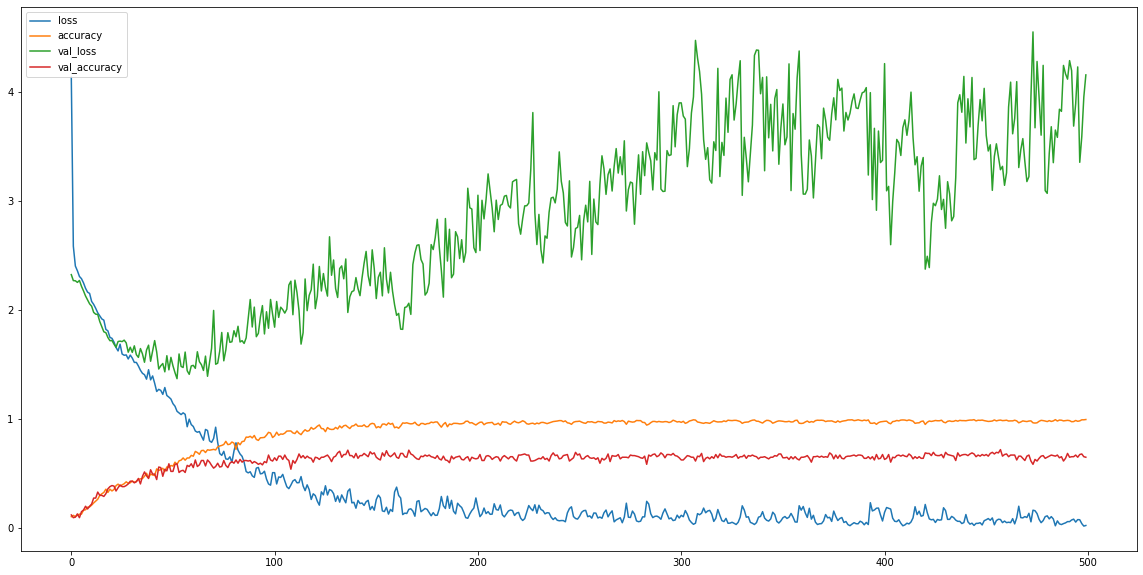

In [39]:
pd.DataFrame(ann_fit.history).plot(figsize = (20, 10))
plt.show()

In [41]:
model_ann.save('ann.h5')